In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint

from keras import backend as K

from util.plots import plot_history
from util.models import cnn_net

from keras.utils.np_utils import to_categorical
from util.data_generator import make_data_generator

from glob import glob
import os
import util.image_import as ii

Using TensorFlow backend.


In [2]:
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

mean_image_train = ii.calulate_mean("../dataset3/res_crop/train")

def subtract_mean(img):
    return img - mean_image_train

In [ ]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'
batch_size = 32
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=True)

In [4]:
model = cnn_net(out_size=8)

In [5]:
# Checkpoint
file_path = 'saved_models/crop_cnn.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [6]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=472 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 18s 308ms/step - loss: 2.0187 - acc: 0.2143 - val_loss: 1.5813 - val_acc: 0.3951

Epoch 00001: val_acc improved from -inf to 0.39509, saving model to saved_models/crop_cnn.e01-a0.40.hdf5
Epoch 2/100
58/58 [==============================] - 17s 288ms/step - loss: 1.5710 - acc: 0.3848 - val_loss: 1.2445 - val_acc: 0.5114

Epoch 00002: val_acc improved from 0.39509 to 0.51136, saving model to saved_models/crop_cnn.e02-a0.51.hdf5
Epoch 3/100
58/58 [==============================] - 16s 273ms/step - loss: 1.4504 - acc: 0.4230 - val_loss: 1.1860 - val_acc: 0.6364

Epoch 00003: val_acc improved from 0.51136 to 0.63636, saving model to saved_models/crop_cnn.e03-a0.64.hdf5
Epoch 4/100
58/58 [==============================] - 16s 277ms/step - loss: 1.3477 - acc: 0.4717 - val_loss: 1.0262 - val_acc: 0.6455

Epoch 00004: val_acc improved from 0.63636 to 0.64545, saving model to saved_models/crop_cnn.e04-a0.65.hdf5
Epoch 5/100
58/58 [============

58/58 [==============================] - 17s 289ms/step - loss: 0.5801 - acc: 0.7732 - val_loss: 0.3223 - val_acc: 0.9227

Epoch 00041: val_acc improved from 0.91364 to 0.92273, saving model to saved_models/crop_cnn.e41-a0.92.hdf5
Epoch 42/100
58/58 [==============================] - 18s 311ms/step - loss: 0.5875 - acc: 0.7652 - val_loss: 0.3372 - val_acc: 0.9250

Epoch 00042: val_acc improved from 0.92273 to 0.92500, saving model to saved_models/crop_cnn.e42-a0.92.hdf5
Epoch 43/100
58/58 [==============================] - 17s 295ms/step - loss: 0.6494 - acc: 0.7431 - val_loss: 0.3758 - val_acc: 0.8727

Epoch 00043: val_acc did not improve from 0.92500
Epoch 44/100
58/58 [==============================] - 21s 359ms/step - loss: 0.6123 - acc: 0.7678 - val_loss: 0.4113 - val_acc: 0.8773

Epoch 00044: val_acc did not improve from 0.92500
Epoch 45/100
58/58 [==============================] - 17s 295ms/step - loss: 0.6176 - acc: 0.7515 - val_loss: 0.4046 - val_acc: 0.8727

Epoch 00045: val_

All classes

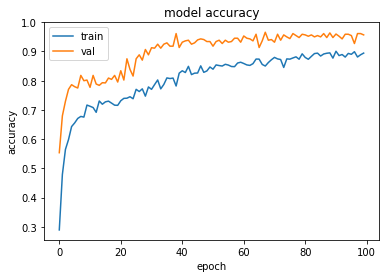

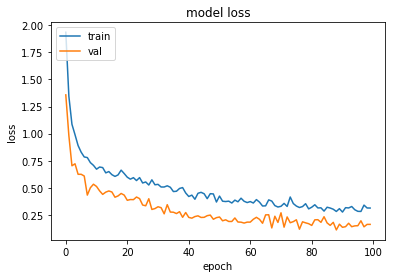

In [8]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_all')

Without catfood beef
----

In [4]:
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=True, ignore=['catfood_beef'])

Found Training 1641 images belonging to 7 classes
Found Test 413 images belonging to 7 classes


In [5]:
model = cnn_net(out_size=7)
# Checkpoint
file_path = 'saved_models/crop_cnn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
51/51 [==============================] - 13s 252ms/step - loss: 1.8019 - acc: 0.3025 - val_loss: 1.1448 - val_acc: 0.6250

Epoch 00001: val_acc improved from -inf to 0.62500, saving model to saved_models/crop_cnn_rembeef.e01-a0.62.hdf5
Epoch 2/100
51/51 [==============================] - 11s 214ms/step - loss: 1.1173 - acc: 0.5342 - val_loss: 0.6754 - val_acc: 0.7795

Epoch 00002: val_acc improved from 0.62500 to 0.77953, saving model to saved_models/crop_cnn_rembeef.e02-a0.78.hdf5
Epoch 3/100
51/51 [==============================] - 12s 235ms/step - loss: 0.8959 - acc: 0.6175 - val_loss: 0.4918 - val_acc: 0.8346

Epoch 00003: val_acc improved from 0.77953 to 0.83465, saving model to saved_models/crop_cnn_rembeef.e03-a0.83.hdf5
Epoch 4/100
51/51 [==============================] - 12s 240ms/step - loss: 0.8111 - acc: 0.6574 - val_loss: 0.4795 - val_acc: 0.8058

Epoch 00004: val_acc did not improve from 0.83465
Epoch 5/100
51/51 [==============================] - 28s 556ms/st

51/51 [==============================] - 15s 293ms/step - loss: 0.1981 - acc: 0.9268 - val_loss: 0.1308 - val_acc: 0.9764

Epoch 00086: val_acc did not improve from 0.98688
Epoch 87/100
51/51 [==============================] - 15s 298ms/step - loss: 0.1662 - acc: 0.9335 - val_loss: 0.1394 - val_acc: 0.9738

Epoch 00087: val_acc did not improve from 0.98688
Epoch 88/100
51/51 [==============================] - 16s 311ms/step - loss: 0.2105 - acc: 0.9069 - val_loss: 0.1056 - val_acc: 0.9633

Epoch 00088: val_acc did not improve from 0.98688
Epoch 89/100
50/51 [============================>.] - ETA: 0s - loss: 0.2074 - acc: 0.9150

Process ForkPoolWorker-339:
Process ForkPoolWorker-338:
Process ForkPoolWorker-340:
Process ForkPoolWorker-337:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/emil/anaconda3/envs/NN1.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/emil/anaconda3/envs/NN1.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/emil/anaconda3/envs/NN1.8/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/emil/anaconda3/envs/NN1.8/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/emil/anaconda3/envs/NN1.8/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/emil/anaconda3/envs/NN1.8/lib/python3.6/multiprocessing/pool.py", line 119, in

KeyboardInterrupt: 

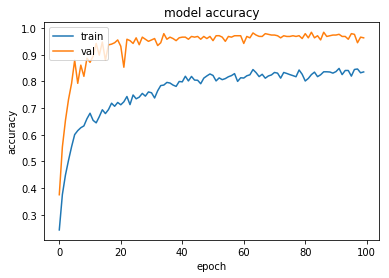

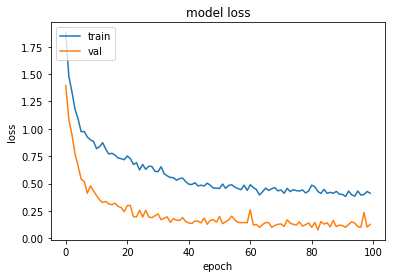

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_removed_beef')

In [5]:
model = cnn_net(out_size=7)
# Checkpoint
file_path = 'saved_models/crop_cnn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
51/51 [==============================] - 13s 252ms/step - loss: 2.0075 - acc: 0.3068 - val_loss: 1.2759 - val_acc: 0.5807

Epoch 00001: val_acc improved from -inf to 0.58073, saving model to saved_models/crop_cnn_rembeef.e01-a0.58.hdf5
Epoch 2/100
51/51 [==============================] - 13s 249ms/step - loss: 1.1676 - acc: 0.5400 - val_loss: 0.8534 - val_acc: 0.7428

Epoch 00002: val_acc improved from 0.58073 to 0.74278, saving model to saved_models/crop_cnn_rembeef.e02-a0.74.hdf5
Epoch 3/100
51/51 [==============================] - 13s 251ms/step - loss: 0.8265 - acc: 0.6902 - val_loss: 0.5261 - val_acc: 0.9108

Epoch 00003: val_acc improved from 0.74278 to 0.91076, saving model to saved_models/crop_cnn_rembeef.e03-a0.91.hdf5
Epoch 4/100
51/51 [==============================] - 23s 455ms/step - loss: 0.6558 - acc: 0.7447 - val_loss: 0.3819 - val_acc: 0.9003

Epoch 00004: val_acc did not improve from 0.91076
Epoch 5/100
51/51 [==============================] - 22s 429ms/st

51/51 [==============================] - 14s 271ms/step - loss: 0.1568 - acc: 0.9436 - val_loss: 0.0745 - val_acc: 0.9764

Epoch 00085: val_acc did not improve from 0.98163
Epoch 86/100
51/51 [==============================] - 14s 266ms/step - loss: 0.1410 - acc: 0.9424 - val_loss: 0.1086 - val_acc: 0.9659

Epoch 00086: val_acc did not improve from 0.98163
Epoch 87/100
51/51 [==============================] - 13s 258ms/step - loss: 0.1180 - acc: 0.9577 - val_loss: 0.0522 - val_acc: 0.9790

Epoch 00087: val_acc did not improve from 0.98163
Epoch 88/100
51/51 [==============================] - 14s 276ms/step - loss: 0.1383 - acc: 0.9525 - val_loss: 0.0824 - val_acc: 0.9816

Epoch 00088: val_acc did not improve from 0.98163
Epoch 89/100
51/51 [==============================] - 16s 306ms/step - loss: 0.1269 - acc: 0.9540 - val_loss: 0.0935 - val_acc: 0.9816

Epoch 00089: val_acc did not improve from 0.98163
Epoch 90/100
51/51 [==============================] - 16s 310ms/step - loss: 0.1312

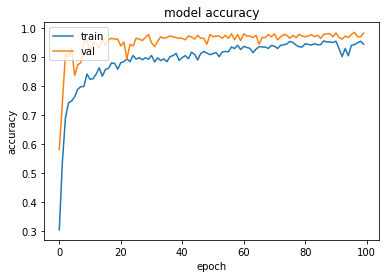

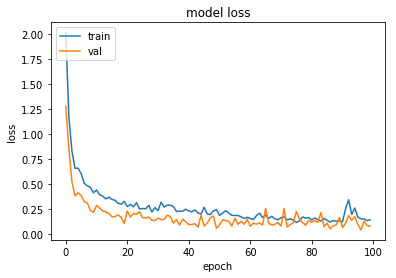

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_removed_beef')

# Training with the FCN

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])

# Checkpoint
file_path = 'saved_models/crop_fcn_all.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=472 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 13s 230ms/step - loss: 11.2457 - acc: 0.1732 - val_loss: 11.0487 - val_acc: 0.1719

Epoch 00001: val_acc improved from -inf to 0.17188, saving model to saved_models/crop_fcn_all.e01-a0.17.hdf5
Epoch 2/100
58/58 [==============================] - 13s 226ms/step - loss: 11.4197 - acc: 0.1753 - val_loss: 11.5333 - val_acc: 0.1591

Epoch 00002: val_acc did not improve from 0.17188
Epoch 3/100
58/58 [==============================] - 12s 208ms/step - loss: 11.1316 - acc: 0.2143 - val_loss: 10.7343 - val_acc: 0.1795

Epoch 00003: val_acc improved from 0.17188 to 0.17955, saving model to saved_models/crop_fcn_all.e03-a0.18.hdf5
Epoch 4/100
58/58 [==============================] - 19s 321ms/step - loss: 10.9624 - acc: 0.2193 - val_loss: 11.1097 - val_acc: 0.2000

Epoch 00004: val_acc improved from 0.17955 to 0.20000, saving model to saved_models/crop_fcn_all.e04-a0.20.hdf5
Epoch 5/100
58/58 [==============================] - 13s 224ms/step -

58/58 [==============================] - 16s 273ms/step - loss: 1.2270 - acc: 0.5442 - val_loss: 1.1458 - val_acc: 0.5227

Epoch 00085: val_acc did not improve from 0.53636
Epoch 86/100
58/58 [==============================] - 16s 272ms/step - loss: 1.1466 - acc: 0.5616 - val_loss: 1.1948 - val_acc: 0.5182

Epoch 00086: val_acc did not improve from 0.53636
Epoch 87/100
58/58 [==============================] - 15s 262ms/step - loss: 1.1427 - acc: 0.5759 - val_loss: 1.0935 - val_acc: 0.5795

Epoch 00087: val_acc improved from 0.53636 to 0.57955, saving model to saved_models/crop_fcn_all.e87-a0.58.hdf5
Epoch 88/100
58/58 [==============================] - 16s 275ms/step - loss: 1.1906 - acc: 0.5574 - val_loss: 1.1545 - val_acc: 0.4955

Epoch 00088: val_acc did not improve from 0.57955
Epoch 89/100
58/58 [==============================] - 16s 281ms/step - loss: 1.1093 - acc: 0.5738 - val_loss: 1.2390 - val_acc: 0.4750

Epoch 00089: val_acc did not improve from 0.57955
Epoch 90/100
58/58 [=

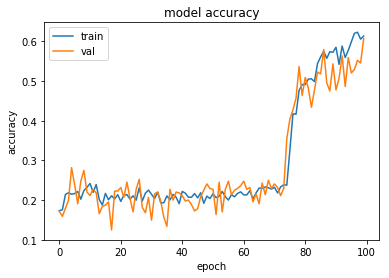

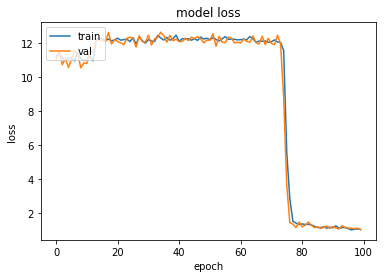

In [6]:
plot_history(history, save=True, path='saved_plots/', name='test_fcn_all')

Without catfood beef

In [4]:
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=True, ignore=['catfood_beef'])

Found Training 1641 images belonging to 7 classes
Found Test 413 images belonging to 7 classes


In [5]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])
# Checkpoint
file_path = 'saved_models/crop_fcn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
51/51 [==============================] - 11s 219ms/step - loss: 8.0096 - acc: 0.2810 - val_loss: 5.2548 - val_acc: 0.2578

Epoch 00001: val_acc improved from -inf to 0.25781, saving model to saved_models/crop_fcn_rembeef.e01-a0.26.hdf5
Epoch 2/100
51/51 [==============================] - 11s 222ms/step - loss: 4.6529 - acc: 0.3825 - val_loss: 3.6173 - val_acc: 0.4409

Epoch 00002: val_acc improved from 0.25781 to 0.44094, saving model to saved_models/crop_fcn_rembeef.e02-a0.44.hdf5
Epoch 3/100
51/51 [==============================] - 11s 224ms/step - loss: 3.4683 - acc: 0.4928 - val_loss: 2.9470 - val_acc: 0.5039

Epoch 00003: val_acc improved from 0.44094 to 0.50394, saving model to saved_models/crop_fcn_rembeef.e03-a0.50.hdf5
Epoch 4/100
51/51 [==============================] - 16s 307ms/step - loss: 3.7385 - acc: 0.4922 - val_loss: 3.6184 - val_acc: 0.4488

Epoch 00004: val_acc did not improve from 0.50394
Epoch 5/100
51/51 [==============================] - 11s 223ms/st


Epoch 00040: val_acc did not improve from 0.67454
Epoch 41/100
51/51 [==============================] - 17s 329ms/step - loss: 2.9157 - acc: 0.6442 - val_loss: 3.9866 - val_acc: 0.4829

Epoch 00041: val_acc did not improve from 0.67454
Epoch 42/100
51/51 [==============================] - 15s 287ms/step - loss: 3.3027 - acc: 0.5921 - val_loss: 3.3882 - val_acc: 0.5879

Epoch 00042: val_acc did not improve from 0.67454
Epoch 43/100
51/51 [==============================] - 15s 297ms/step - loss: 3.1921 - acc: 0.6089 - val_loss: 2.6136 - val_acc: 0.7192

Epoch 00043: val_acc improved from 0.67454 to 0.71916, saving model to saved_models/crop_fcn_rembeef.e43-a0.72.hdf5
Epoch 44/100
51/51 [==============================] - 15s 285ms/step - loss: 2.8616 - acc: 0.6574 - val_loss: 3.1630 - val_acc: 0.6273

Epoch 00044: val_acc did not improve from 0.71916
Epoch 45/100
51/51 [==============================] - 15s 301ms/step - loss: 3.0595 - acc: 0.6096 - val_loss: 3.9136 - val_acc: 0.5118

Epo

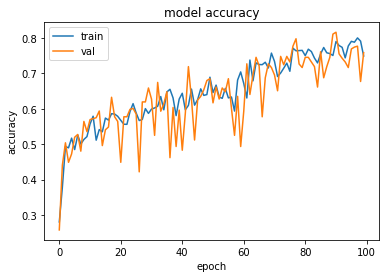

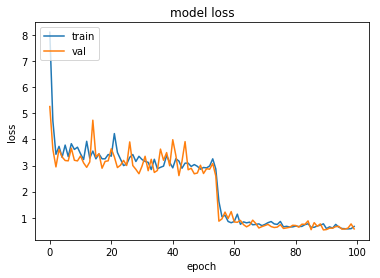

In [7]:
plot_history(history, save=False, path='saved_plots/', name='test_fcn_rembeef')

|Summarize             | Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|:--------------------:|:-----:|:-------------:|:-----------------:|:---------------:|:-------------------:|
| All Classes: CNN          |   68  |     0.3775    |      0.8509       |      0.1321     |        0.9659       |
| Without catfood beef: CNN |   97  |     0.1524    |      0.9442       |      0.0415     |        0.9869       |
| All Classes: FCN          |   100  |     1.0325    |      0.6129       |      1.0181     |        0.6068       |
| Without catfood beef: FCN |   91  |     0.5968    |      0.7912       |      0.5509     |        0.8163       |

Without loading images into RAM
======

CNN
----

In [3]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'
batch_size = 32
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False)

Found 1875 images belonging to 8 classes.
Found 472 images belonging to 8 classes.


In [4]:
model = cnn_net(out_size=8)
# Checkpoint
file_path = 'saved_models/crop_cnn.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=472 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 18s 313ms/step - loss: 1.9016 - acc: 0.2616 - val_loss: 1.3424 - val_acc: 0.5402

Epoch 00001: val_acc improved from -inf to 0.54018, saving model to saved_models/crop_cnn.e01-a0.54.hdf5
Epoch 2/100
58/58 [==============================] - 16s 278ms/step - loss: 1.4292 - acc: 0.4191 - val_loss: 1.0932 - val_acc: 0.6068

Epoch 00002: val_acc improved from 0.54018 to 0.60682, saving model to saved_models/crop_cnn.e02-a0.61.hdf5
Epoch 3/100
58/58 [==============================] - 15s 264ms/step - loss: 1.2291 - acc: 0.4969 - val_loss: 0.8970 - val_acc: 0.6182

Epoch 00003: val_acc improved from 0.60682 to 0.61818, saving model to saved_models/crop_cnn.e03-a0.62.hdf5
Epoch 4/100
58/58 [==============================] - 16s 279ms/step - loss: 1.1561 - acc: 0.5238 - val_loss: 0.7433 - val_acc: 0.7500

Epoch 00004: val_acc improved from 0.61818 to 0.75000, saving model to saved_models/crop_cnn.e04-a0.75.hdf5
Epoch 5/100
58/58 [============

58/58 [==============================] - 21s 364ms/step - loss: 0.3205 - acc: 0.8658 - val_loss: 0.1808 - val_acc: 0.9295

Epoch 00081: val_acc did not improve from 0.94545
Epoch 82/100
58/58 [==============================] - 20s 342ms/step - loss: 0.3220 - acc: 0.8633 - val_loss: 0.2334 - val_acc: 0.9523

Epoch 00082: val_acc improved from 0.94545 to 0.95227, saving model to saved_models/crop_cnn.e82-a0.95.hdf5
Epoch 83/100
58/58 [==============================] - 21s 357ms/step - loss: 0.3225 - acc: 0.8664 - val_loss: 0.2124 - val_acc: 0.9364

Epoch 00083: val_acc did not improve from 0.95227
Epoch 84/100
58/58 [==============================] - 22s 372ms/step - loss: 0.2960 - acc: 0.8719 - val_loss: 0.2128 - val_acc: 0.9432

Epoch 00084: val_acc did not improve from 0.95227
Epoch 85/100
58/58 [==============================] - 22s 382ms/step - loss: 0.3341 - acc: 0.8674 - val_loss: 0.1596 - val_acc: 0.9545

Epoch 00085: val_acc improved from 0.95227 to 0.95455, saving model to save

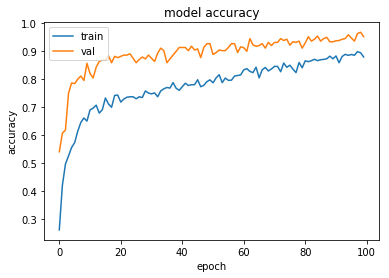

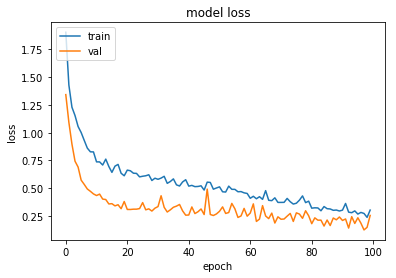

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_all_false')

Training **CNN** without catfood beef

In [3]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'
batch_size = 32
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False, ignore=['catfood_beef'])

Found 1641 images belonging to 7 classes.
Found 413 images belonging to 7 classes.


In [4]:
model = cnn_net(out_size=7)
# Checkpoint
file_path = 'saved_models/crop_cnn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=472 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 19s 319ms/step - loss: 1.6554 - acc: 0.3228 - val_loss: 1.2233 - val_acc: 0.5461

Epoch 00001: val_acc improved from -inf to 0.54607, saving model to saved_models/crop_cnn_rembeef.e01-a0.55.hdf5
Epoch 2/100
58/58 [==============================] - 16s 273ms/step - loss: 1.3703 - acc: 0.4479 - val_loss: 0.8871 - val_acc: 0.6607

Epoch 00002: val_acc improved from 0.54607 to 0.66067, saving model to saved_models/crop_cnn_rembeef.e02-a0.66.hdf5
Epoch 3/100
58/58 [==============================] - 29s 504ms/step - loss: 1.2019 - acc: 0.5059 - val_loss: 0.7209 - val_acc: 0.7483

Epoch 00003: val_acc improved from 0.66067 to 0.74831, saving model to saved_models/crop_cnn_rembeef.e03-a0.75.hdf5
Epoch 4/100
58/58 [==============================] - 17s 292ms/step - loss: 0.9934 - acc: 0.5911 - val_loss: 0.5523 - val_acc: 0.8315

Epoch 00004: val_acc improved from 0.74831 to 0.83146, saving model to saved_models/crop_cnn_rembeef.e04-a0.83.hdf5

58/58 [==============================] - 20s 352ms/step - loss: 0.2053 - acc: 0.9094 - val_loss: 0.1184 - val_acc: 0.9708

Epoch 00081: val_acc did not improve from 0.98427
Epoch 82/100
58/58 [==============================] - 21s 367ms/step - loss: 0.3572 - acc: 0.8648 - val_loss: 0.1177 - val_acc: 0.9753

Epoch 00082: val_acc did not improve from 0.98427
Epoch 83/100
58/58 [==============================] - 22s 384ms/step - loss: 0.2195 - acc: 0.8968 - val_loss: 0.0852 - val_acc: 0.9685

Epoch 00083: val_acc did not improve from 0.98427
Epoch 84/100
58/58 [==============================] - 22s 372ms/step - loss: 0.2786 - acc: 0.8852 - val_loss: 0.1198 - val_acc: 0.9708

Epoch 00084: val_acc did not improve from 0.98427
Epoch 85/100
58/58 [==============================] - 22s 386ms/step - loss: 0.2699 - acc: 0.8860 - val_loss: 0.0805 - val_acc: 0.9775

Epoch 00085: val_acc did not improve from 0.98427
Epoch 86/100
58/58 [==============================] - 20s 341ms/step - loss: 0.2754

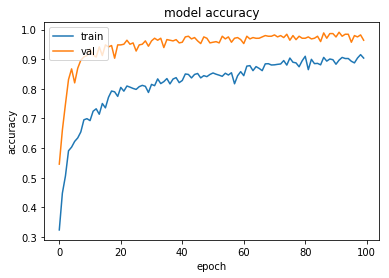

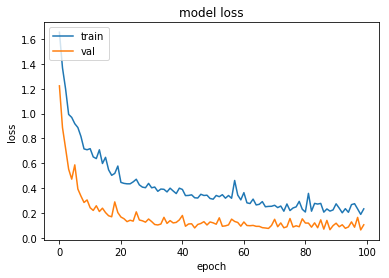

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_rembeef_false')

FCN
----

Training **FCN** with all classes

In [3]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'
batch_size = 32
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False)

Found 1875 images belonging to 8 classes.
Found 472 images belonging to 8 classes.


In [4]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])

# Checkpoint
file_path = 'saved_models/crop_fcn_all.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=472 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 17s 292ms/step - loss: 3.1690 - acc: 0.3681 - val_loss: 1.8278 - val_acc: 0.5045

Epoch 00001: val_acc improved from -inf to 0.50446, saving model to saved_models/crop_fcn_all.e01-a0.50.hdf5
Epoch 2/100
58/58 [==============================] - 15s 260ms/step - loss: 2.3879 - acc: 0.4764 - val_loss: 1.4547 - val_acc: 0.5409

Epoch 00002: val_acc improved from 0.50446 to 0.54091, saving model to saved_models/crop_fcn_all.e02-a0.54.hdf5
Epoch 3/100
58/58 [==============================] - 15s 267ms/step - loss: 1.8767 - acc: 0.5225 - val_loss: 1.4865 - val_acc: 0.5705

Epoch 00003: val_acc improved from 0.54091 to 0.57045, saving model to saved_models/crop_fcn_all.e03-a0.57.hdf5
Epoch 4/100
58/58 [==============================] - 19s 329ms/step - loss: 1.7395 - acc: 0.5558 - val_loss: 1.2602 - val_acc: 0.6227

Epoch 00004: val_acc improved from 0.57045 to 0.62273, saving model to saved_models/crop_fcn_all.e04-a0.62.hdf5
Epoch 5/100
58/

58/58 [==============================] - 21s 358ms/step - loss: 0.6496 - acc: 0.8450 - val_loss: 0.5969 - val_acc: 0.7977

Epoch 00084: val_acc did not improve from 0.84318
Epoch 85/100
58/58 [==============================] - 20s 343ms/step - loss: 0.6857 - acc: 0.8297 - val_loss: 0.6198 - val_acc: 0.8386

Epoch 00085: val_acc did not improve from 0.84318
Epoch 86/100
58/58 [==============================] - 20s 352ms/step - loss: 0.6800 - acc: 0.8485 - val_loss: 0.6754 - val_acc: 0.8045

Epoch 00086: val_acc did not improve from 0.84318
Epoch 87/100
58/58 [==============================] - 21s 371ms/step - loss: 0.6252 - acc: 0.8411 - val_loss: 0.7566 - val_acc: 0.8000

Epoch 00087: val_acc did not improve from 0.84318
Epoch 88/100
58/58 [==============================] - 20s 349ms/step - loss: 0.5280 - acc: 0.8516 - val_loss: 0.7089 - val_acc: 0.8409

Epoch 00088: val_acc did not improve from 0.84318
Epoch 89/100
58/58 [==============================] - 20s 343ms/step - loss: 0.6033

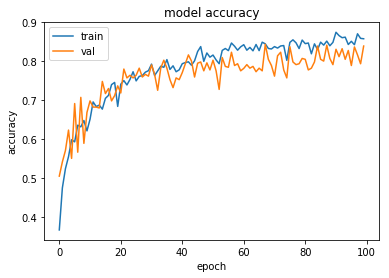

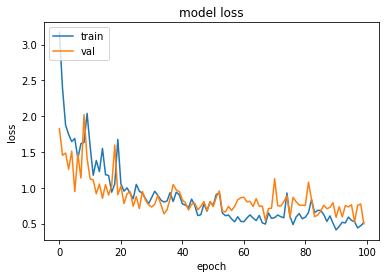

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_fcn_all_false')

Training **FCN** without catfood beef

In [3]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'
batch_size = 32
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False, ignore=['catfood_beef'])

Found 1641 images belonging to 7 classes.
Found 413 images belonging to 7 classes.


In [4]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])
# Checkpoint
file_path = 'saved_models/crop_fcn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
51/51 [==============================] - 14s 282ms/step - loss: 2.6661 - acc: 0.4324 - val_loss: 2.2880 - val_acc: 0.5391

Epoch 00001: val_acc improved from -inf to 0.53906, saving model to saved_models/crop_fcn_rembeef.e01-a0.54.hdf5
Epoch 2/100
51/51 [==============================] - 14s 282ms/step - loss: 2.5756 - acc: 0.5351 - val_loss: 1.6160 - val_acc: 0.6037

Epoch 00002: val_acc improved from 0.53906 to 0.60367, saving model to saved_models/crop_fcn_rembeef.e02-a0.60.hdf5
Epoch 3/100
51/51 [==============================] - 26s 509ms/step - loss: 2.5107 - acc: 0.5614 - val_loss: 1.8785 - val_acc: 0.6142

Epoch 00003: val_acc improved from 0.60367 to 0.61417, saving model to saved_models/crop_fcn_rembeef.e03-a0.61.hdf5
Epoch 4/100
51/51 [==============================] - 14s 278ms/step - loss: 1.7714 - acc: 0.6396 - val_loss: 1.1292 - val_acc: 0.7034

Epoch 00004: val_acc improved from 0.61417 to 0.70341, saving model to saved_models/crop_fcn_rembeef.e04-a0.70.hdf5

51/51 [==============================] - 19s 371ms/step - loss: 0.3747 - acc: 0.9136 - val_loss: 0.4912 - val_acc: 0.9029

Epoch 00084: val_acc did not improve from 0.91339
Epoch 85/100
51/51 [==============================] - 18s 358ms/step - loss: 0.2854 - acc: 0.9255 - val_loss: 0.6961 - val_acc: 0.8766

Epoch 00085: val_acc did not improve from 0.91339
Epoch 86/100
51/51 [==============================] - 18s 362ms/step - loss: 0.4702 - acc: 0.9065 - val_loss: 0.5940 - val_acc: 0.8845

Epoch 00086: val_acc did not improve from 0.91339
Epoch 87/100
51/51 [==============================] - 20s 391ms/step - loss: 0.4246 - acc: 0.9044 - val_loss: 0.5562 - val_acc: 0.9108

Epoch 00087: val_acc did not improve from 0.91339
Epoch 88/100
51/51 [==============================] - 19s 366ms/step - loss: 0.4443 - acc: 0.9004 - val_loss: 0.6916 - val_acc: 0.8583

Epoch 00088: val_acc did not improve from 0.91339
Epoch 89/100
51/51 [==============================] - 19s 367ms/step - loss: 0.5844

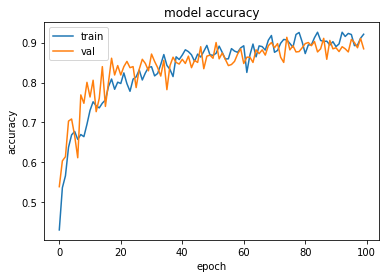

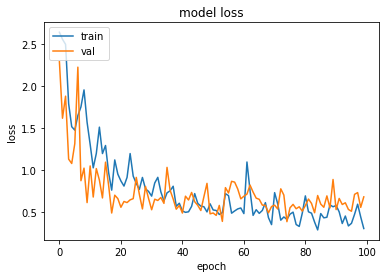

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_fcn_rembeef_false')

|Summarize             | Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|:--------------------:|:-----:|:-------------:|:-----------------:|:---------------:|:-------------------:|
| All Classes: CNN          |   99  |     0.2367    |      0.8955       |      0.1482     |        0.9682       |
| Without catfood beef: CNN |   92  |     0.2386    |      0.8968       |      0.0884     |        0.9910       |
| All Classes: FCN          |   68  |     0.4933    |      0.8443       |      0.5453     |        0.8432      |
| Without catfood beef: FCN |   75  |     0.4102    |      0. 9065      |      0.3848     |        0.9134       |